# Введение

## Что такое индекс промышленного производства?
Индекс промышленного производства (IPI) является ежемесячным экономическим показателем, измеряющим реальный объем производства в обрабатывающей, горнодобывающей, электрической и газовой промышленности относительно базового года. Об этом сообщает Совет конференции.

## Как работает индекс промышленного производства (IPI)?
Совет Федеральной резервной системы (FRB) публикует индекс промышленного производства (IPI) в середине каждого месяца, а пересмотр предыдущих оценок публикуется в конце каждого марта. IPI измеряет уровни производства в производственном секторе, горнодобывающей промышленности, включая услуги по бурению нефтяных и газовых месторождений – а также в электроэнергетике и газоснабжении. Он также измеряет мощность, оценку уровней производства, которые могут быть устойчиво поддержаны; и использование мощностей, отношение фактического объема производства к мощности.

## Расчет IPI
Уровни промышленного производства и производственных мощностей выражаются в виде индексного уровня по отношению к базовому году (в настоящее время 2012 год). Другими словами, они выражают не абсолютные объемы производства или значения, а процентное изменение объема производства по отношению к 2012 году. Исходные данные разнообразны, включая физические затраты и объемы производства, такие как тонны стали; скорректированные на инфляцию показатели продаж; и, когда другие эти другие источники данных недоступны, часы, регистрируемые производственными работниками. ФРБ получает эти данные от отраслевых ассоциаций и государственных учреждений и агрегирует их в индекс, используя формулу Фишера-идеала.

В рамках общего ИПИ существует ряд субиндексов, дающих детальный взгляд на выпуск продукции узкоспециализированных отраслей: продажа бытового газа, мороженого и замороженных десертов, ковровые и ковровые мельницы, пружинные и проволочные изделия, чугун, аудио-и видеотехника, бумага-это лишь некоторые из десятков отраслей, по которым имеются ежемесячные данные о производстве.

# Актуальность
Отраслевые данные полезны для менеджеров и инвесторов в рамках конкретных направлений бизнеса, в то время как сводный индекс является важным макроэкономическим показателем для экономистов и инвесторов. Колебания в промышленном секторе составляют большую часть колебаний общего экономического роста, поэтому ежемесячная метрика помогает держать инвесторов в курсе изменений в объеме производства. В то же время ИПИ отличается от самого популярного показателя экономического производства-валового внутреннего продукта (ВВП): ВВП измеряет цену, уплачиваемую конечным потребителем, поэтому он включает добавленную стоимость в розничном секторе, которую IPI игнорирует. Важно также отметить, что промышленный сектор составляет низкую и падающую долю экономики США: менее 20% ВВП по состоянию на 2016 год.

Использование производственных мощностей является полезным показателем силы спроса. Низкая загрузка производственных мощностей-переизбыток мощностей, другими словами – сигнализирует о слабом спросе. Политики могли бы воспринять это как сигнал о необходимости фискального или монетарного стимулирования. Инвесторы могли бы воспринять это как признак надвигающегося спада или – в зависимости от сигналов из Вашингтона-как признак грядущего стимулирования. Высокая загрузка производственных мощностей, с другой стороны, может служить предупреждением о перегреве экономики, предполагая риск роста цен и пузырей активов. Политики могут отреагировать на эти угрозы повышением процентных ставок или жесткой бюджетной экономией, или же они могут позволить бизнес-циклу идти своим чередом, что в конечном итоге может привести к рецессии.

(Взято с https://www.investopedia.com/terms/i/ipi.asp)

Отметим, что в ходе этой работы рассматривается только индекс электрической и газовой промышленности взятый отсюда https://fred.stlouisfed.org/series/IPG2211A2N#0.

# Ход работы

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xlrd
%matplotlib inline

from pandas.plotting import autocorrelation_plot

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Импортируем данные:

In [2]:
df = pd.read_excel('https://github.com/anastasiarazb/skillbox-data-analyst-intensive/raw/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls', skiprows=10)

Сделаем столбец observation_date столбцом индексов:

In [3]:
df.index = pd.to_datetime(df['observation_date'], format='%d.%m.%Y %H:%M')
del df['observation_date']

Построим график изменения индекса промышленного производства:

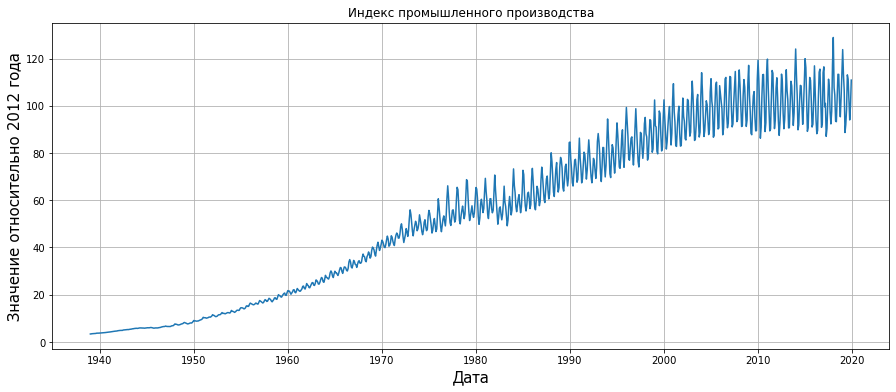

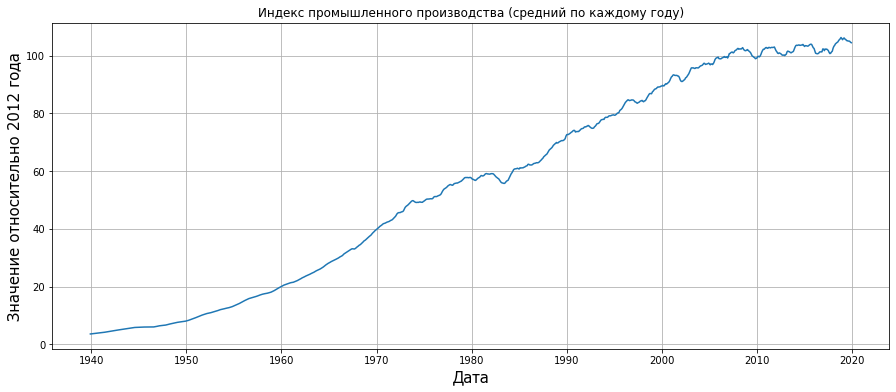

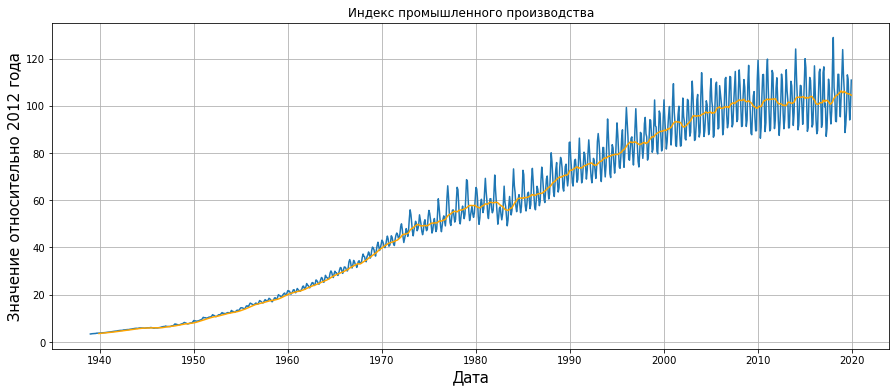

In [4]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства')
plt.plot(df.index, df['IPG2211A2N'])
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
plt.show()
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства (средний по каждому году)')
plt.plot(df.index, df['IPG2211A2N'].rolling(12).mean())
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
plt.show()
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства')
plt.plot(df.index, df['IPG2211A2N'])
plt.plot(df.index, df['IPG2211A2N'].rolling(12).mean(), color='orange')
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
plt.show()

Из усредненных данных можно сделать вывод, что в целом индекс только растет. Однако, начиная с 2009 года, этот рост почти незаметен.

Посмотрим на выборку данных, начиная с 2009 года:

In [5]:
date_from = pd.Timestamp(day=1, month=1, year=2009) # Назначаем штамп времени на дату, с которой хотим посмотреть данные
cutted_df = df[date_from <= df.index]  # Обрезаем датафрейм

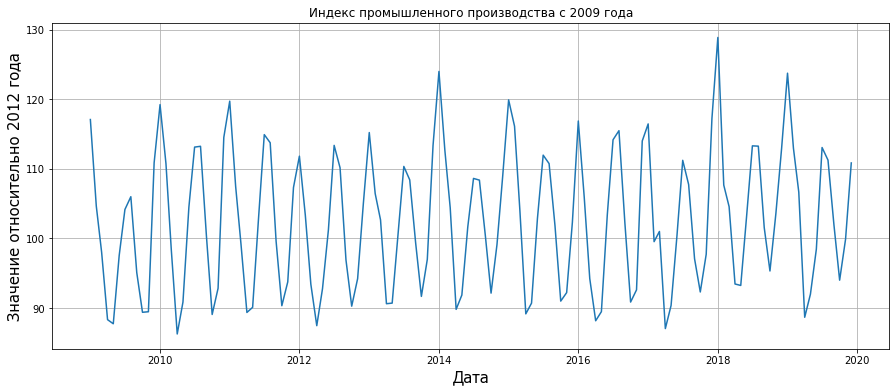

In [6]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства с 2009 года')
plt.plot(cutted_df.index, cutted_df['IPG2211A2N'])
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
plt.show()

Чтобы убедиться в росте функции на данном промежутке, построим линейный регрессор:

In [7]:
regressor = LinearRegression() # Задаем в качестве регрессора линейный
N = len(cutted_df) # количество записей в обрезанном Датафрейме
x_range = list(range(N)) # 
X = pd.DataFrame(x_range)
regressor.fit(X, cutted_df['IPG2211A2N'])
result = regressor.predict(X)

Модель обучилась. Посмотрим, действительно ли возрастает зависимость на данном промежутке:

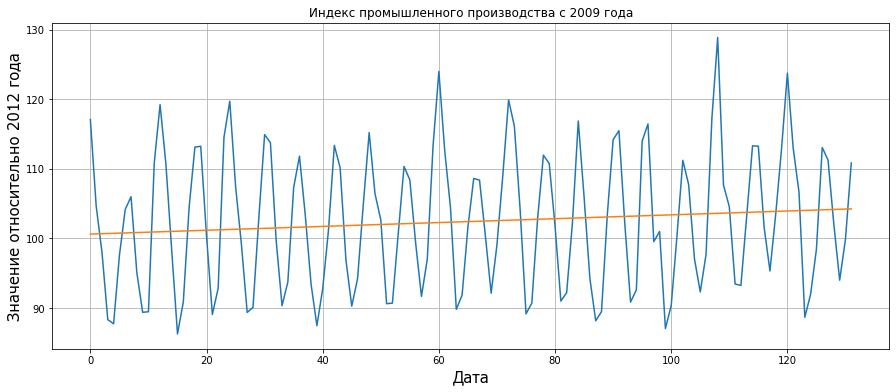

In [8]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства с 2009 года')
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
plt.plot(X.index, cutted_df['IPG2211A2N'])  # нужна общая шкала для 2 графиков =>индекс заменен на новый
plt.plot(X.index, result)
plt.show()

Исходя из графика видим, что в среднем индекс действительно возрастает на этом промежутке.

Также можно обратить внимание, что максимумы находятся зимой и летом, а минимумы - весной и осенью.
Поэтому посмотрим на зависимость отдельно взятых индексов в январе, июле, марте и октябре:

Создадим датафрейм с интересующими нас данными:

In [9]:
january = df[df.index.month == 1]['IPG2211A2N'].tolist()
april = df[df.index.month == 4]['IPG2211A2N'].tolist()
july = df[df.index.month == 7]['IPG2211A2N'].tolist()
october = df[df.index.month == 10]['IPG2211A2N'].tolist()
month_df = pd.DataFrame(index=df[df.index.month == 10].index.year, data = {'january': january, 
                                                                           'april': april, 
                                                                           'july': july, 
                                                                           'october':october})

Построим график:

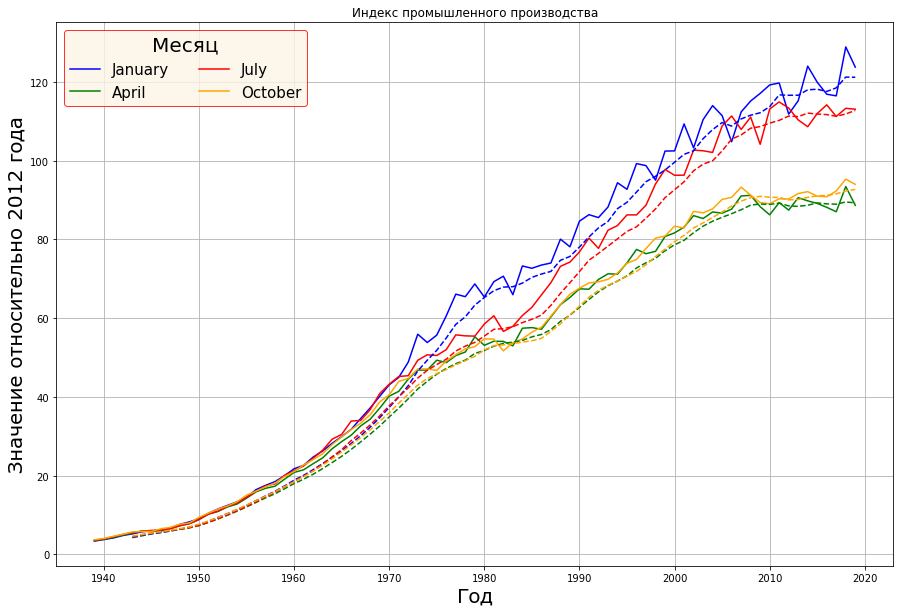

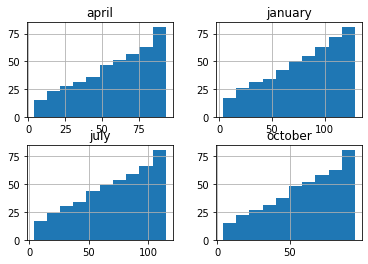

In [10]:
fig, ax = plt.subplots()

plt.grid()
plt.title('Индекс промышленного производства')
plt.xlabel(u'Год', family='verdana', fontsize = 20)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 20)

ax.plot(month_df.index, month_df['january'], label = 'January', color = 'b')
ax.plot(month_df.index, month_df['april'], label = 'April', color = 'g')
ax.plot(month_df.index, month_df['july'], label = 'July', color = 'r')
ax.plot(month_df.index, month_df['october'], label = 'October', color = 'orange')
plt.plot(month_df.index, month_df['january'].rolling(5).mean(), '--', color = 'b')
plt.plot(month_df.index, month_df['april'].rolling(5).mean(), '--', color = 'g')
plt.plot(month_df.index, month_df['july'].rolling(5).mean(), '--', color = 'r')
plt.plot(month_df.index, month_df['october'].rolling(5).mean(), '--', color = 'orange')


ax.legend(fontsize = 15,
          ncol = 2,
          facecolor = 'oldlace',
          edgecolor = 'r',
          title = 'Месяц',
          title_fontsize = '20'
         )

fig.set_figwidth(15)
fig.set_figheight(10)
plt.show()
month_df.hist(cumulative = 1)
plt.show()

Таким образом, мы убедились, что индекс зимой имеет наибольшее значение, летом чуть ниже, а осенью и весной значительно ниже.

Индекс промышленного производства (IPI) является ежемесячным экономическим показателем, измеряющим реальный объем производства в обрабатывающей, горнодобывающей, электрической и газовой промышленности относительно базового года. 
В нашем случае рассматривается индекс только электрической и газовой промышленности.

Исходя из этого можно понять, что такая разница между временами года объясняется климатом США. Например, зимой логично использование нагревателей, а летом - кондиционеров и вентиляторов.

Посмотрим на корреляцию данных:

In [11]:
month_df.corr()

,january,april,july,october
january,1.000000,0.996209,0.995044,0.995846
april,0.996209,1.000000,0.995111,0.999048
july,0.995044,0.995111,1.000000,0.997123
october,0.995846,0.999048,0.997123,1.000000


Видим, что данные отлично коррелируют попарно друг с другом.

Посмотрим автокорелляцию

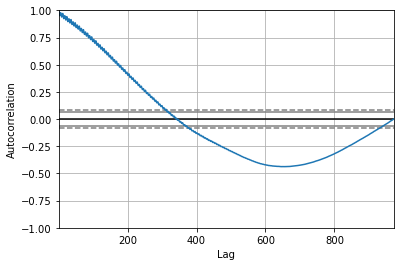

In [12]:
pd.plotting.autocorrelation_plot(df['IPG2211A2N'])

Видно, что чем ниже сдвиг, тем лучше данные автокоррелируют.

# Выводы

    - Индекс промышленного производства электроэнергии и газовой промышленности нестрого монотонно растет.
    - С 2009 года скорость роста значительно упала.
    - Зимой индекс промышленного производства максимален для каждого года, летом принимает значение незначительно ниже, весной и осенью - минимальное значение.
    - С течением времени данные сезонов все больше отличаются друг от друга.
    - Данные за каждый сезон отлично попарно друг с другом коррелируют.
    - Автокорреляция исходных данных снижается с увеличением сдвига.

# Неприменимые методы

Квантили не имеет смысла применять в данной ситуации, т.к. наблюдается монотонный рост зависимости.

In [15]:
df.quantile(0.95)

IPG2211A2N    109.80761
Name: 0.95, dtype: float64

# Подведем итоги:
В ходе работы были исследованы данные IPG2211A2N за период 1939-2019 гг. Были построены и изучены различные зависимости изменения этого индекса. Построен линейный регрессор для исследования зависимости в период 2009-2019 гг. На основе полученного сделаны выводы. А также выяснены методы исследования, которые не имеет смысла применять для изучаемых данных.